Программа на Python, которая выполняет классификацию изображений с высоким качеством, точностью, детализацией и масштабированием. Он отобразит результат на экране. Давайте подробно рассмотрим каждую команду:

импортировать необходимые библиотеки

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

Эта строка загружает предварительно обученную модель **MobileNetV2**, представляющую собой архитектуру сверточной нейронной сети, обученную на наборе данных ImageNet.

In [ ]:
# Загрузите предварительно обученную модель MobileNetV2
model = tf.keras.applications.MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 1s 0us/step


Эта функция принимает путь к изображению в качестве входных данных, открывает изображение с помощью Pillow, изменяет его размер до требуемого размера (в данном случае 224x224 пикселя), преобразует его в массив NumPy и расширяет его размеры, чтобы соответствовать входной форме, ожидаемой моделью. Он также применяет необходимые шаги предварительной обработки, характерные для модели MobileNetV2.

In [ ]:
# Загрузите и предварительно обработайте изображение
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((224, 224))  # Отрегулируйте размер в соответствии с требованиями модели
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet_v2.preprocess_input(img_array)

Эта функция принимает путь к изображению в качестве входных данных, выполняет предварительную обработку изображения с помощью функции preprocess_image, передает предварительно обработанное изображение в модель для прогнозирования, декодирует прогнозы для получения меток классов и возвращает наиболее вероятное имя класса.

In [ ]:
# Выполнить классификацию объектов на изображении
def classify_image(image_path):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)
    class_name = decoded_predictions[0][0][1]
    return class_name

image_path = 'path_to_your_image.jpg': замените 'path_to_your_image.jpg' фактическим путем к изображению, которое вы хотите классифицировать.

In [ ]:
# Путь к изображению, которое вы хотите классифицировать
image_path = 'path_to_your_image.jpg'

классификация = classify_image(image_path): эта строка вызывает функцию classify_image с предоставленным путем к изображению и сохраняет возвращенное имя класса в переменной классификации.

In [ ]:
# Классифицировать изображение
classification = classify_image(image_path)

35363/35363 [==============================] - 0s 0us/step


img = Image.open(image_path): открывает исходное изображение с помощью модуля Image от Pillow.

img = Image.open(image_path): открывает исходное изображение с помощью модуля Image от Pillow.

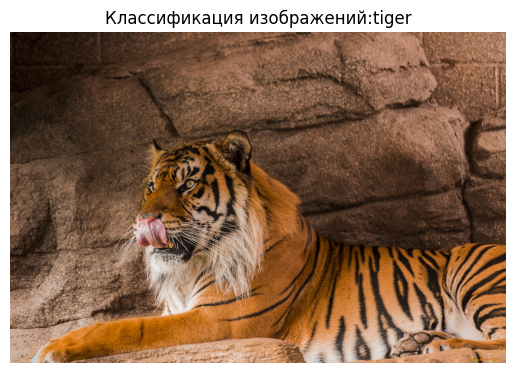

In [ ]:
# Отображение изображения и результата классификации
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Классификация изображений:{classification}')
plt.show()